# Hotdog Classifier
> Notebook for exercises making a classifier for pictures of hotdogs and burgers.

- toc: true 
- badges: true
- comments: true
- categories: [jupyter]
- image: images/chart-preview.png

In [1]:
# Hotdog Classifier
# Fast book setup
import fastbook
fastbook.setup_book()

from fastbook import *
from fastai.vision.widgets import *

In [2]:
# Bing API keys
conf_id = "efb1b149-c219-4091-be6d-14a279c405c4"
key_id = "1be3ada0f2a649d087e9fb39798485a0"

#Define method to search bing for images
def search_images_bing_new(key, term, customConfigId, min_sz=128):
    url = 'https://api.bing.microsoft.com/v7.0/custom/images/search?' + 'q=' + term + '&' + 'customconfig=' + customConfigId + '&' + 'count=150'
    r = requests.get(url, headers={'Ocp-Apim-Subscription-Key': key})
    search_results = r.json()
    return L([img["thumbnailUrl"] for img in search_results["value"][:150]])

In [3]:
# Search bing for pictures of hotdogs
ims = search_images_bing_new(key_id, 'hot dog', conf_id)

len(ims)

150

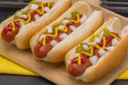

In [4]:
# Download picuters of hotdogs
dest = 'images/hot_dog.jpg'
download_url(ims[0], dest)

im = Image.open(dest)
im.to_thumb(128,128)

In [5]:
# Download training data

image_types = 'hot dog', 'burger'
path = Path('foods')

if not path.exists():
    path.mkdir()
    for o in image_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing_new(key_id, o, conf_id)
        download_images(dest, urls=results)
        
fns = get_image_files(path)
failed = verify_images(fns)
failed.map(Path.unlink)

(#0) []

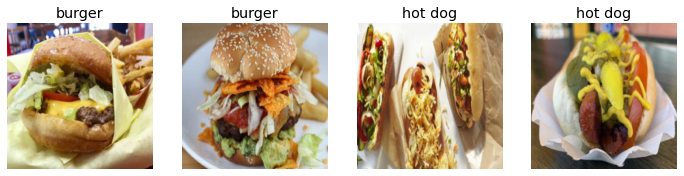

In [6]:
food = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=.2, seed = 42),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(224, min_scale=0.5)
    )
dls = food.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

In [7]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.226112,0.206438,0.083333,00:03


epoch,train_loss,valid_loss,error_rate,time
0,0.343744,0.164238,0.050000,00:04
1,0.246327,0.101516,0.066667,00:03
2,0.167483,0.097955,0.050000,00:03
3,0.126819,0.106567,0.050000,00:03


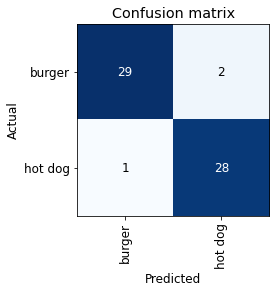

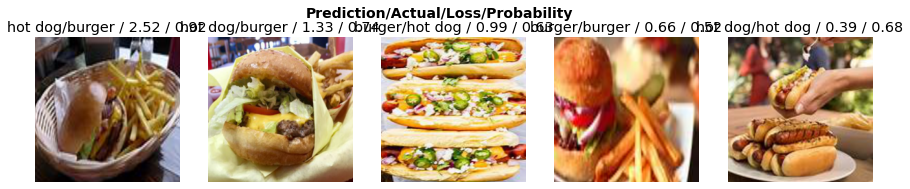

In [8]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()
interp.plot_top_losses(5, nrows=1)

In [9]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [10]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()

In [11]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [12]:
img = PILImage.create(btn_upload.data[-1])

In [13]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [18]:
pred,pred_idx,probs = learn_inf.predict(img)

NameError: name 'learn_inf' is not defined

In [17]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

NameError: name 'pred' is not defined

In [14]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [15]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
    btn_run.on_click(on_click_classify)

In [19]:
VBox([widgets.Label('Select your bear!'),
btn_upload, btn_run, out_pl, lbl_pred])

In [20]:
!pip install voila
!jupyter serverextension enable voila --sys-prefix

     |████████████████████████████████| 1.9 MB 15.1 MB/s eta 0:00:01
     |████████████████████████████████| 552 kB 48.8 MB/s eta 0:00:01
     |████████████████████████████████| 188 kB 51.0 MB/s eta 0:00:01
     |████████████████████████████████| 64 kB 4.1 MB/s  eta 0:00:01
  Attempting uninstall: nbconvert
    Found existing installation: nbconvert 5.6.1
    Uninstalling nbconvert-5.6.1:
      Successfully uninstalled nbconvert-5.6.1
ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

nbdev 1.1.5 requires nbconvert<6, but you'll have nbconvert 6.0.7 which is incompatible.
Enabling: voila
- Writing config: /opt/conda/envs/fastai/etc/jupyter
    - Validating...
      voila 0.2.6 OK
